# Incidence de la varicelle 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202146          7   9296     6108   12484      14           9   
1     202145          7   9178     6625   11731      14          10   
2     202144          7   8762     5653   11871      13           8   
3     202143          7   8145     5164   11126      12           7   
4     202142          7   9443     6037   12849      14           9   
5     202141          7   4021     2239    5803       6           3   
6     202140          7   4441     2454    6428       7           4   
7     202139          7   2291     1056    3526       3           1   
8     202138          7   4325     2267    6383       7           4   
9     202137          7   1964      754    3174       3           1   
10    202136          7   3441     1730    5152       5           2   
11    202135          7   2562     1107    4017       4           2   
12    202134          7   1429      378    2480       2           0   
13    202133          7   3829     1830    5828       6           3   
14    202132          7   4108     1895    6321       6           3   
15    202131          7   4793     2301    7285       7           3   
16    202130          7   7190     4191   10189      11           6   
17    202129          7   6800     4109    9491      10           6   
18    202128          7   9734        0   21731      15           0   
19    202127          7   9026     4316   13736      14           7   
20    202126          7   7284     4108   10460      11           6   
21    202125          7   9351     6540   12162      14          10   
22    202124          7  12034     8937   15131      18          13   
23    202123          7   9116     6420   11812      14          10   
24    202122          7   4817     2752    6882       7           4   
25    202121          7   6092     3458    8726       9           5   
26    202120          7   7485     4601   10369      11           7   
27    202119          7   6654     4370    8938      10           7   
28    202118          7   3912     2110    5714       6           3   
29    202117          7   4686     2878    6494       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1586  199126          7  17608    11304   23912      31          20   
1587  199125          7  16169    10700   21638      28          18   
1588  199124          7  16171    10071   22271      28          17   
1589  199123          7  11947     7671   16223      21          13   
1590  199122          7  15452     9953   20951      27          17   
1591  199121          7  14903     8975   20831      26          16   
1592  199120          7  19053    12742   25364      34          23   
1593  199119          7  16739    11246   22232      29          19   
1594  199118          7  21385    13882   28888      38          25   
1595  199117          7  13462     8877   18047      24          16   
1596  199116          7  14857    10068   19646      26          18   
1597  199115          7  13975     9781   18169      25          18   
1598  199114          7  12265     7684   16846      22          14   
1599  199113          7   9567     6041   13093      17          11   
1600  199112          7  10864     7331   14397      19          13   
1601  199111          7  15574    11184   19964      27          19   
1602  199110          7  16643    11372   21914      29          20   
1603  199109          7  13741     8780   18702      24          15   
1604  199108          7  13289     8813   17765      23          15   
1605  199107          7  12337     8077   16597      22          15   
1606  199106          7  10877     7013   14741      19          12   
1607  199105          7  10442     6544   14340      18          11   
1608  199104          7   7913     4563   11263      14           8   
1609  199103          7  15387    10484   20290      27          18   
1610  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non !

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [15]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]
raw_data['period']

0      2021-11-15/2021-11-21
1      2021-11-08/2021-11-14
2      2021-11-01/2021-11-07
3      2021-10-25/2021-10-31
4      2021-10-18/2021-10-24
5      2021-10-11/2021-10-17
6      2021-10-04/2021-10-10
7      2021-09-27/2021-10-03
8      2021-09-20/2021-09-26
9      2021-09-13/2021-09-19
10     2021-09-06/2021-09-12
11     2021-08-30/2021-09-05
12     2021-08-23/2021-08-29
13     2021-08-16/2021-08-22
14     2021-08-09/2021-08-15
15     2021-08-02/2021-08-08
16     2021-07-26/2021-08-01
17     2021-07-19/2021-07-25
18     2021-07-12/2021-07-18
19     2021-07-05/2021-07-11
20     2021-06-28/2021-07-04
21     2021-06-21/2021-06-27
22     2021-06-14/2021-06-20
23     2021-06-07/2021-06-13
24     2021-05-31/2021-06-06
25     2021-05-24/2021-05-30
26     2021-05-17/2021-05-23
27     2021-05-10/2021-05-16
28     2021-05-03/2021-05-09
29     2021-04-26/2021-05-02
                ...         
1586   1991-06-24/1991-06-30
1587   1991-06-17/1991-06-23
1588   1991-06-10/1991-06-16
1589   1991-06

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [23]:
sorted_raw_data = raw_data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [25]:
periods = sorted_raw_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

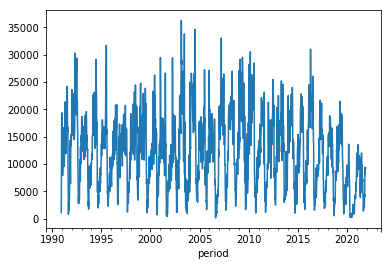

In [26]:
sorted_raw_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

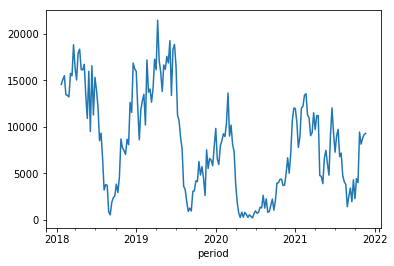

In [28]:
sorted_raw_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.


In [29]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_raw_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [30]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_raw_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

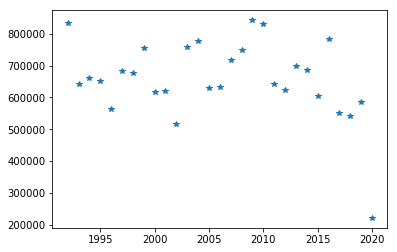

In [32]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [33]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64